# Plot delta (G,G,R,I,Z,Y) Mag vs G - I for No Optim


- author : Sylvie Dagoret
- affiliation : LAL/IN2P3/CNRS
- creation date : December 11th 2018
- update : October 22th 2018

In [302]:
import pandas as pd
import numpy as np
import os,sys
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline
from scipy.interpolate import interp1d

In [303]:
import os
import re

In [304]:
from astropy.io import fits

In [305]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [306]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [307]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (14, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [308]:
path='.'
txt_files = [f for f in os.listdir(path) if f.endswith('_nooptim.txt')]  

In [309]:
txt_files

['dataout_DeltaZvsGmI_z10_nooptim.txt',
 'dataout_DeltaIvsGmI_z14_nooptim.txt',
 'dataout_DeltaGvsGmI_z18_nooptim.txt',
 'dataout_DeltaYvsGmI_z18_nooptim.txt',
 'dataout_DeltaYvsGmI_z16_nooptim.txt',
 'dataout_DeltaYvsGmI_z10_nooptim.txt',
 'dataout_DeltaUvsGmI_z20_nooptim.txt',
 'dataout_DeltaZvsGmI_z20_nooptim.txt',
 'dataout_DeltaYvsGmI_z20_nooptim.txt',
 'dataout_DeltaGvsGmI_z14_nooptim.txt',
 'dataout_DeltaRvsGmI_z10_nooptim.txt',
 'dataout_DeltaYvsGmI_z12_nooptim.txt',
 'dataout_DeltaRvsGmI_z12_nooptim.txt',
 'dataout_DeltaUvsGmI_z12_nooptim.txt',
 'dataout_DeltaUvsGmI_z18_nooptim.txt',
 'dataout_DeltaRvsGmI_z18_nooptim.txt',
 'dataout_DeltaZvsGmI_z18_nooptim.txt',
 'dataout_DeltaIvsGmI_z12_nooptim.txt',
 'dataout_DeltaGvsGmI_z12_nooptim.txt',
 'dataout_DeltaIvsGmI_z20_nooptim.txt',
 'dataout_DeltaUvsGmI_z16_nooptim.txt',
 'dataout_DeltaGvsGmI_z10_nooptim.txt',
 'dataout_DeltaIvsGmI_z10_nooptim.txt',
 'dataout_DeltaGvsGmI_z16_nooptim.txt',
 'dataout_DeltaZvsGmI_z12_nooptim.txt',


# Definitions

### Delta U vs G-I

In [310]:
keysel_filename='^dataout_DeltaUvsGmI_z*'
keysel2_filename='^dataout_DeltaUvsGmI_z([0-9]+)*'

In [311]:
title="$\Delta U$ vs G-I (no optimization)"
xlabel="color : G-I (mag)"
ylabel="$\Delta U$ (mag)"
YMIN,YMAX=-0.010,0.010
figfilename="FigDeltaUvsCol_nooptim.png"

## Delta G vs G-I

In [312]:
#keysel_filename='^dataout_DeltaGvsGmI_z*'
#keysel2_filename='^dataout_DeltaGvsGmI_z([0-9]+)*'

In [313]:
#title="$\Delta G$ vs G-I (no optimization)"
#xlabel="color : G-I (mag)"
#ylabel="$\Delta G (mag)$"
#YMIN,YMAX=-0.0075,0.0075
#figfilename="FigDeltaGvsCol_nooptim.png"

In [314]:
#title="$\Delta R$ vs G-I (airmass-optimized in I at each airmass)"
#xlabel="color : G-I (mag)"
#ylabel="$\Delta R (mag)$"
#YMIN,YMAX=-0.0075,0.0075
#figfilename="FigDeltaR2vsCol.png"

## Delta R vs G-I

In [315]:
#keysel_filename='^dataout_DeltaRvsGmI_z*'
#keysel2_filename='^dataout_DeltaRvsGmI_z([0-9]+)*'

In [316]:
#title="$\Delta R$ vs G-I (no optimization)"
#xlabel="color : G-I (mag)"
#ylabel="$\Delta R$ (mag)"
#YMIN,YMAX=-0.010,0.010
#figfilename="FigDeltaRvsCol_nooptim.png"

## Delta I vs G-I

In [317]:
#keysel_filename='^dataout_DeltaIvsGmI_z*'
#keysel2_filename='^dataout_DeltaIvsGmI_z([0-9]+)*'

In [318]:
#title="$\Delta I$ vs G-I (no optimization)"
#xlabel="color : G-I (mag)"
#ylabel="$\Delta I$ (mag)"
#YMIN,YMAX=-0.010,0.010
#figfilename="FigDeltaIvsCol_nooptim.png"

## Delta Z vs G-I

In [319]:
#keysel_filename='^dataout_DeltaZvsGmI_z*'
#keysel2_filename='^dataout_DeltaZvsGmI_z([0-9]+)*'

In [320]:
#title="$\Delta Z$ vs G-I (no optimization)"
#xlabel="color : G-I (mag)"
#ylabel="$\Delta Z$ (mag)"
#YMIN,YMAX=-0.010,0.010
#figfilename="FigDeltaZvsCol_nooptim.png"

## Delta Y vs G-I

In [321]:
keysel_filename='^dataout_DeltaYvsGmI_z*'
keysel2_filename='^dataout_DeltaYvsGmI_z([0-9]+)*'

In [322]:
title="$\Delta Y$ vs G-I (no optimization)"
xlabel="color : G-I (mag)"
ylabel="$\Delta Y$ (mag)"
YMIN,YMAX=-0.025,0.025
figfilename="FigDeltaYvsCol_nooptim.png"

# START

In [323]:
sel_files = []
for file in txt_files:
    if re.findall(keysel_filename,file):
        sel_files.append(file)

sel_files=np.array(sel_files)

In [324]:
sel_files.sort()

In [325]:
sel_files

array(['dataout_DeltaYvsGmI_z10_nooptim.txt',
       'dataout_DeltaYvsGmI_z12_nooptim.txt',
       'dataout_DeltaYvsGmI_z14_nooptim.txt',
       'dataout_DeltaYvsGmI_z16_nooptim.txt',
       'dataout_DeltaYvsGmI_z18_nooptim.txt',
       'dataout_DeltaYvsGmI_z20_nooptim.txt'], dtype='<U35')

In [326]:
NBFILES=len(sel_files)

In [327]:
all_am=[]
for file in sel_files:
    am_str=re.findall(keysel2_filename,file)[0]
    am=float(am_str)/10.
    all_am.append(am)

In [328]:
all_am=np.array(all_am)

In [329]:
all_am

array([1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [330]:
jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=NBFILES)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

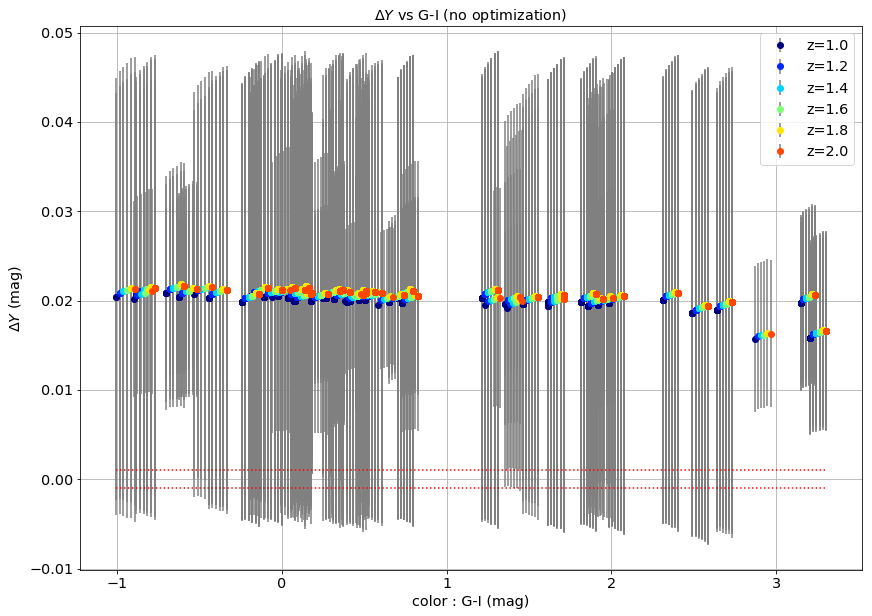

In [331]:
colormin=[]
colormax=[]

for idx in np.arange(NBFILES):    
    colorVal = scalarMap.to_rgba(idx)
    thelabel="z={:2.1f}".format(all_am[idx])
    data=np.loadtxt(os.path.join(path,sel_files[idx]))
    color=data[:,0]
    colormin.append(color.min())
    colormax.append(color.max())
    mag=data[:,1]
    err=data[:,2]
    #plt.plot(color,mag,'-',color=colorVal)
    plt.errorbar(color,mag, yerr=err, fmt='o',color=colorVal,ecolor='grey', label=thelabel) 

COLORMIN=np.min(np.array(colormin))   
COLORMAX=np.max(np.array(colormax))   

plt.plot([COLORMIN,COLORMAX],[0.001,0.001],"r:")
plt.plot([COLORMIN,COLORMAX],[-0.001,-0.001],"r:")    
plt.grid(True)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(loc='best')
#plt.ylim(YMIN,YMAX)
plt.savefig(figfilename)

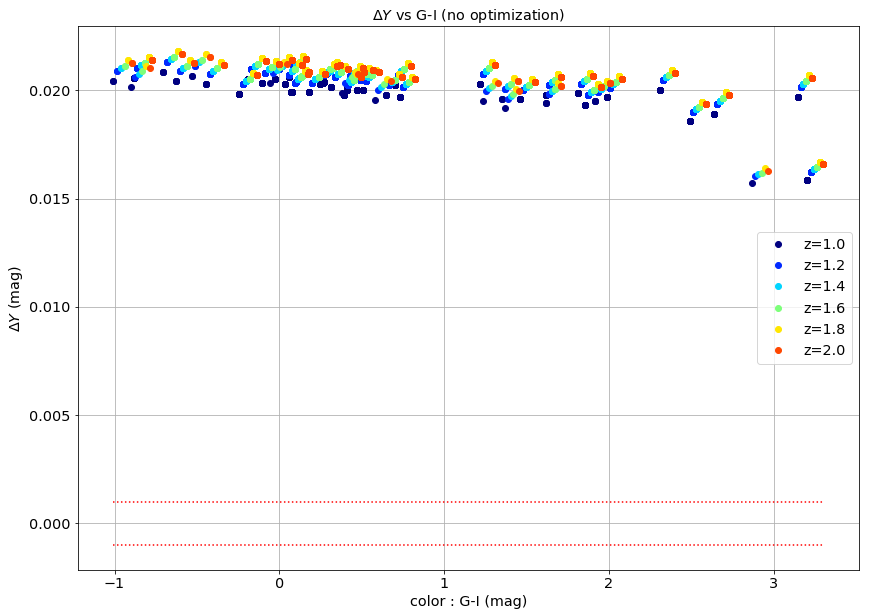

In [332]:
colormin=[]
colormax=[]

for idx in np.arange(NBFILES):    
    colorVal = scalarMap.to_rgba(idx)
    thelabel="z={:2.1f}".format(all_am[idx])
    data=np.loadtxt(os.path.join(path,sel_files[idx]))
    color=data[:,0]
    
    colormin.append(color.min())
    colormax.append(color.max())
    
    mag=data[:,1]
    err=data[:,2]
    plt.plot(color,mag,'o',color=colorVal,label=thelabel)
    #plt.errorbar(color,mag, yerr=err, fmt='o',color=colorVal,ecolor='grey', label=thelabel) 
    
COLORMIN=np.min(np.array(colormin))   
COLORMAX=np.max(np.array(colormax))   

plt.plot([COLORMIN,COLORMAX],[0.001,0.001],"r:")
plt.plot([COLORMIN,COLORMAX],[-0.001,-0.001],"r:")

plt.grid(True)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(loc='best')
#plt.ylim(YMIN,YMAX)
plt.savefig(figfilename)

In [333]:
colormin

[-1.00789577, -0.98519619, -0.96231718, -0.93930592, -0.91619574, -0.89303699]

In [334]:
COLORMIN

-1.00789577

In [335]:
COLORMAX

3.30239565

0    [-0.00036559  0.02036553]
1    [-0.00037375  0.02082859]
2    [-0.00037679  0.02099119]
3    [-0.00037916  0.02110529]
4    [-0.00038528  0.02138643]
5    [-0.00038356  0.02127023]
slope = -0.0003774 +/- 6.536e-06 


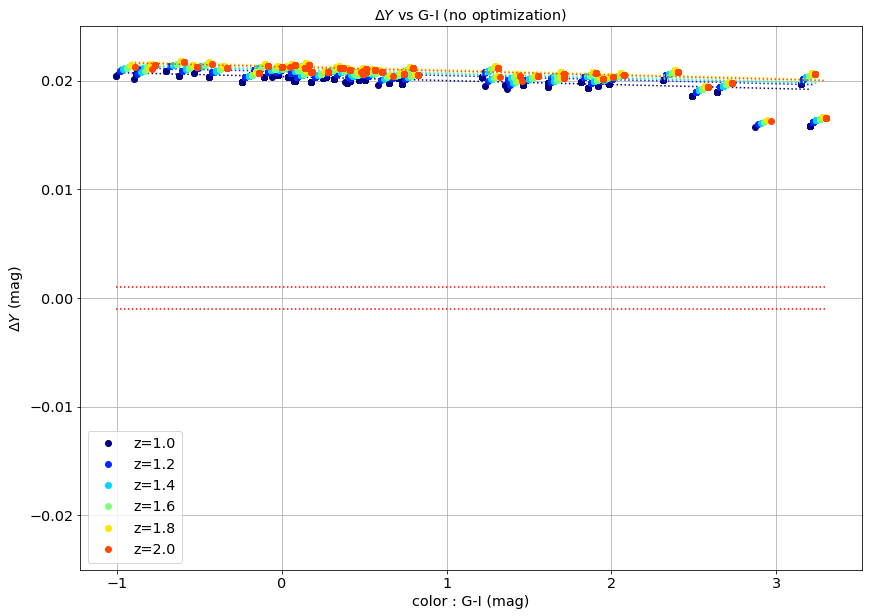

In [336]:
colormin=[]
colormax=[]
slope=[]
intercept=[]
for idx in np.arange(NBFILES):    
    colorVal = scalarMap.to_rgba(idx)
    thelabel="z={:2.1f}".format(all_am[idx])
    data=np.loadtxt(os.path.join(path,sel_files[idx]))
    color=data[:,0]
    
    colormin.append(color.min())
    colormax.append(color.max())
    
    mag=data[:,1]
    err=data[:,2]
    plt.plot(color,mag,'o',color=colorVal,label=thelabel)
    #plt.errorbar(color,mag, yerr=err, fmt='o',color=colorVal,ecolor='grey', label=thelabel) 
    X=color
    Y=mag
    Z = np.polyfit(X, Y,1)
    slope.append(Z[0])
    intercept.append(Z[1])
    print(idx,"  ",Z)
    P = np.poly1d(Z)
    plt.plot([color.min(),color.max()],[P(color.min()),P(color.max())],':',color=colorVal)
    
COLORMIN=np.min(np.array(colormin))   
COLORMAX=np.max(np.array(colormax))   

plt.plot([COLORMIN,COLORMAX],[0.001,0.001],"r:")
plt.plot([COLORMIN,COLORMAX],[-0.001,-0.001],"r:")

plt.grid(True)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(loc='best')
plt.ylim(YMIN,YMAX)
plt.savefig(figfilename)

slope=np.array(slope)

slope_mean=np.average(slope)
slope_std=np.std(slope)

print("slope = {:6.4g} +/- {:6.4g} ".format(slope_mean,slope_std))